In [ ]:
!pip install transformers

In [ ]:
from transformers import ViTFeatureExtractor, ViTForImageClassification, ViTImageProcessor
from IPython.display import Image, display
from PIL import Image as img
import matplotlib.pyplot as plt
import keras
import random
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Tiền xử lý hình ảnh như: điều chỉnh kích thước, chuấn hóa và chia ảnh thành các path
# Sử dụng mô hình ViT của Google đã được huấn luyện trước
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
# Mô hình cho tác vụ phân loại hình ảnh sử dụng ViT
# Nó chứa kiến trúc ViT và một lớp đầu ra để dự đoán nhãn cho hình ảnh.
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [ ]:
def image_classification(image_name):

  for i in image_name:
    image_array = img.open(i)
    inputs = feature_extractor(images = image_array, return_tensors = 'pt')
    outputs = model(**inputs)

    # Logits là đầu ra chưa được chuẩn hóa của mô hình.
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).item()
    predicted_class_label = model.config.id2label[predicted_class_idx]

    # Hiển thị hình ảnh cùng với nhãn dự đoán
    plt.imshow(image_array)
    plt.title(f"Predicted class: {predicted_class_label}")
    plt.axis("off")
    plt.show()

In [ ]:
img_arr = []

for i in range(2, 15):
  img_arr.append("img"+str(i)+".jpg")

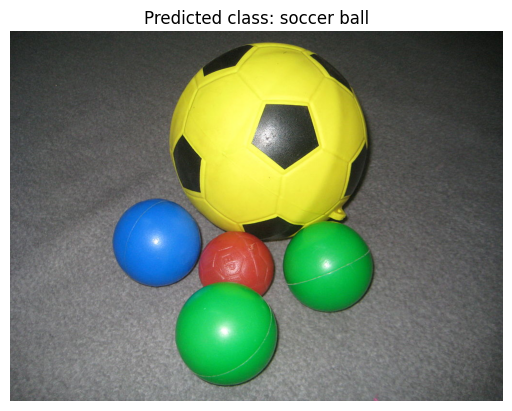

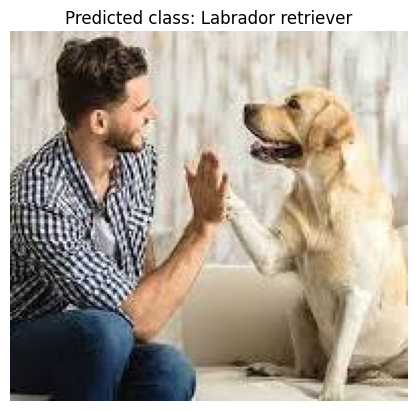

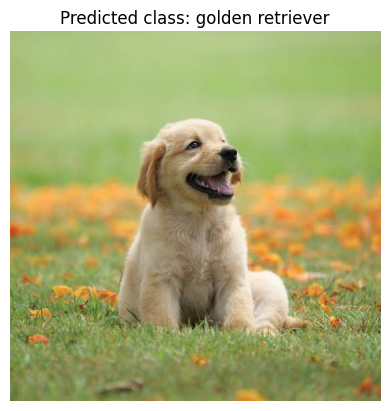

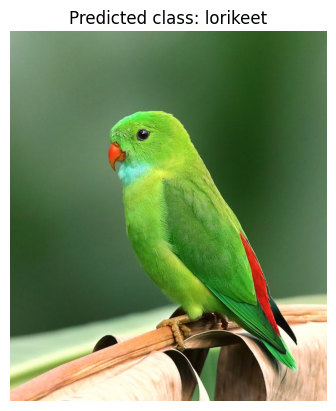

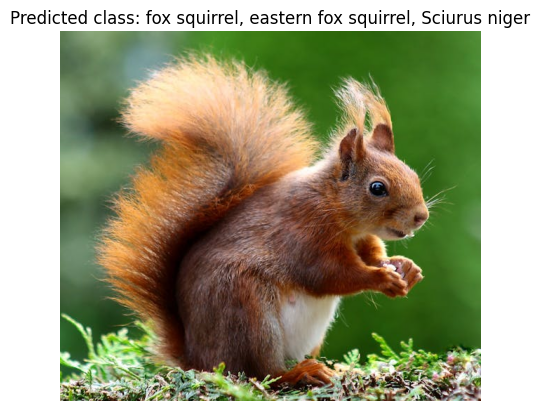

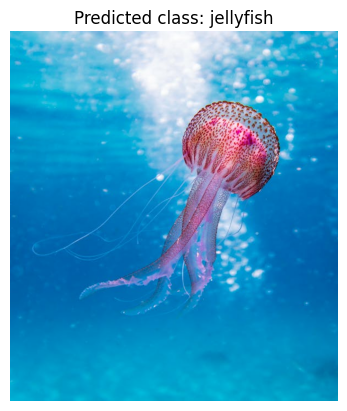

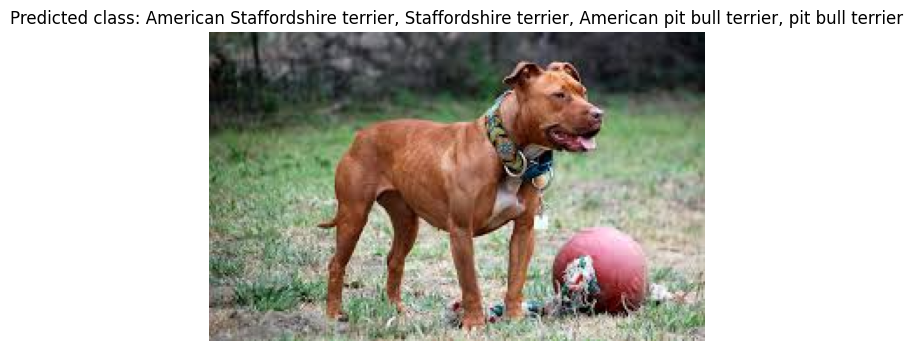

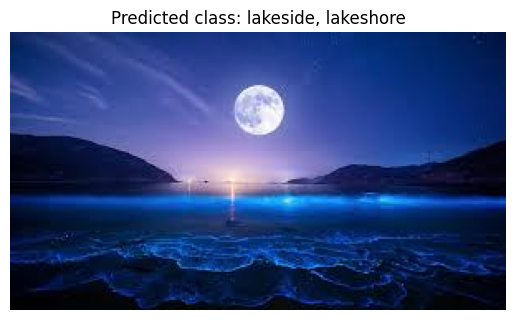

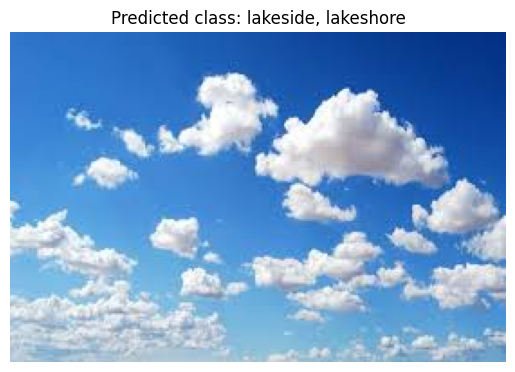

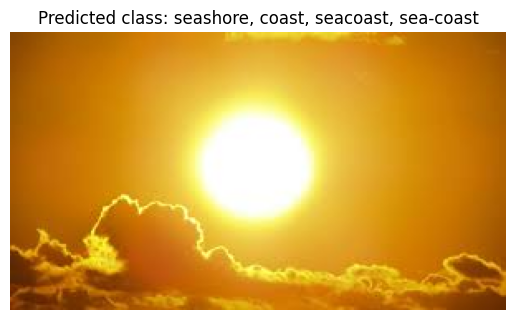

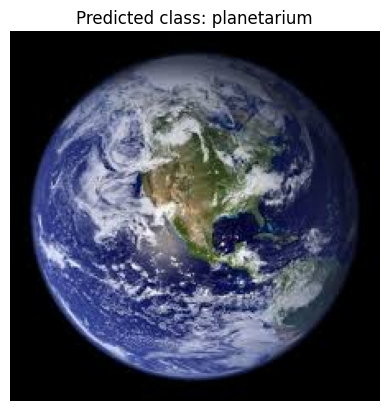

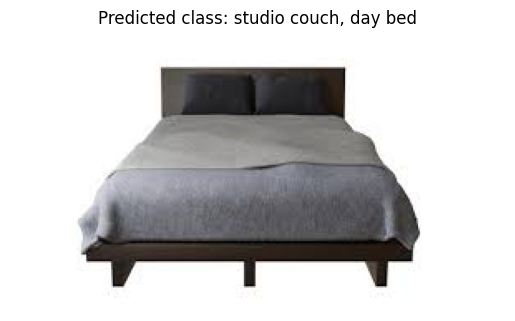

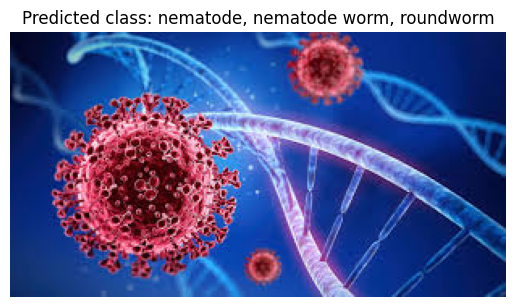

In [ ]:
image_classification(img_arr)